### Feedforward Neural Network (FNN)
### MNIST dataset
### Goal : To classify handwritten digits from the MNIST dataset

In [13]:
# Critical libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# Load data and preprocessing
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
# Nomalisation [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [16]:
# Flatten out
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [17]:
# Build the FNN with the input layer
inputs = keras.Input(shape=(784,))
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)

outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8506 - loss: 0.4867 - val_accuracy: 0.9647 - val_loss: 0.1193
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9571 - loss: 0.1408 - val_accuracy: 0.9688 - val_loss: 0.1003
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9671 - loss: 0.1017 - val_accuracy: 0.9738 - val_loss: 0.0819
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9730 - loss: 0.0849 - val_accuracy: 0.9752 - val_loss: 0.0826
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9773 - loss: 0.0737 - val_accuracy: 0.9751 - val_loss: 0.0878
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9784 - loss: 0.0676 - val_accuracy: 0.9776 - val_loss: 0.0721
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9815 - loss: 0.0565 - val_accuracy: 0.9756 - val_loss: 0.0839
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9812 - loss: 0

In [22]:
# Model Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 1s - 3ms/step - accuracy: 0.9796 - loss: 0.0821
Test accuracy: 0.98


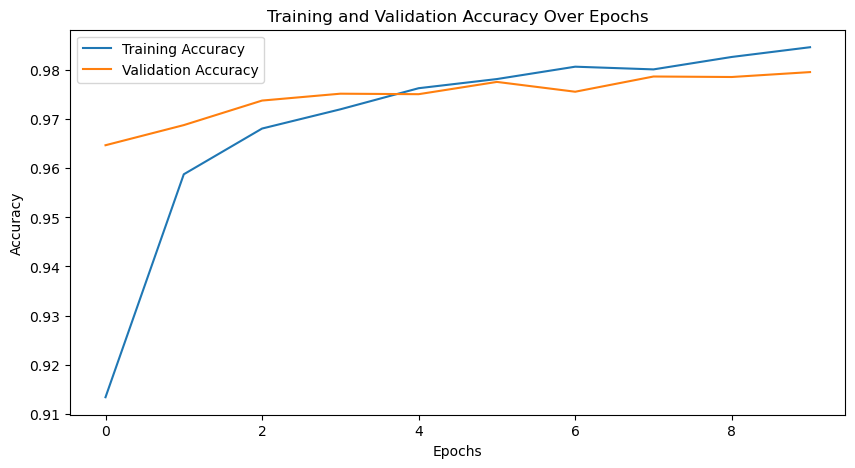

In [23]:
# Visualize the model
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
# Model Predictions on test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


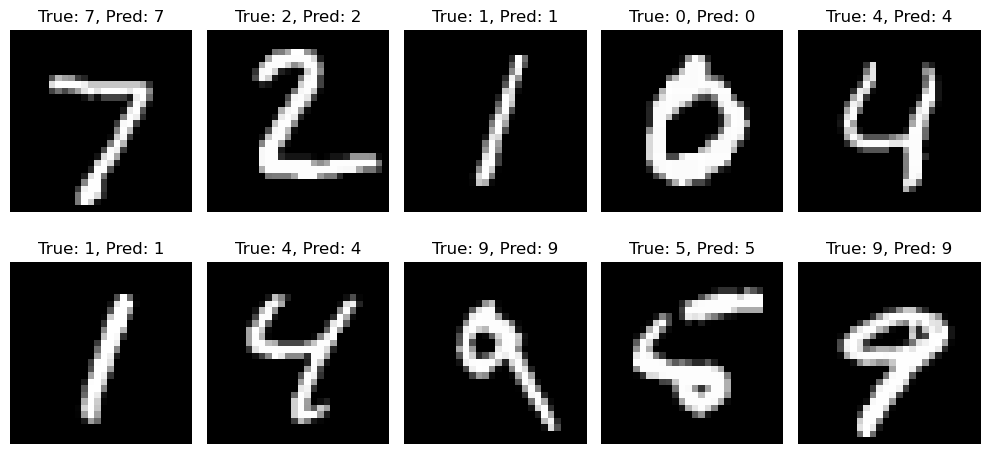

In [25]:
# Visualize the sample predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [26]:
# Confusion Matrix and Classification report
cm = confusion_matrix(y_test, predicted_labels)
print("Classification Report:\n", classification_report(y_test, predicted_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.95      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [27]:
# add new data
new_data = np.random.rand(5, 784)
new_predictions = model.predict(new_data)
new_labels = np.argmax(new_predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


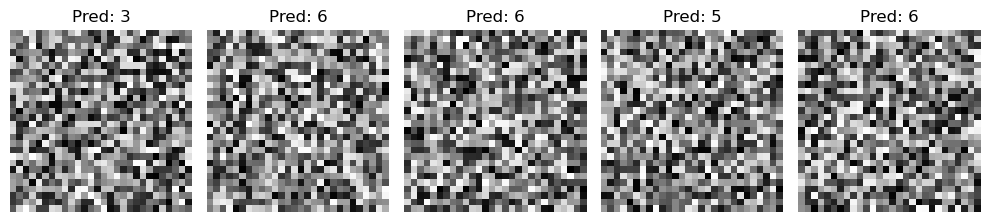

In [29]:
# Visualize new data predictions
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1,5, i + 1)
    plt.imshow(new_data[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {new_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()